# **Importing the necessary libraries**

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# **Load the dataset**

In [21]:
data = pd.read_csv('/content/sample_data/diabetes.csv')

In [22]:
data.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

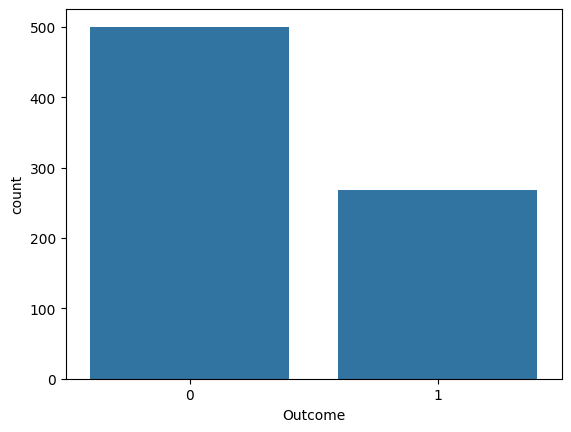

In [26]:
sns.countplot(x='Outcome', data=data)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate the data into independent and dependent variables
X = data.drop('DiabetesPedigreeFunction', axis=1)
y = data['Outcome']
# Scale the data
sc = StandardScaler()
X = sc.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_train dimension =', X_train.shape)
print('X_test dimension =', X_test.shape)
print('y_train dimension =', y_train.shape)
print('y_test dimension =', y_test.shape)

X_train dimension = (614, 8)
X_test dimension = (154, 8)
y_train dimension = (614,)
y_test dimension = (154,)


In [32]:
from sklearn import linear_model

# Create the Logistic Regression model with specified parameters
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')

# Fit the model to the training data
lm.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

# **Model Training**

In [33]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression mode
model = LogisticRegression()

# Train the model with the training data
model.fit(X_train, y_train)

LogisticRegression()

# **Model evaluation**

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Prediction
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 100.0


In [35]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[107   0]
 [  0  47]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        47

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



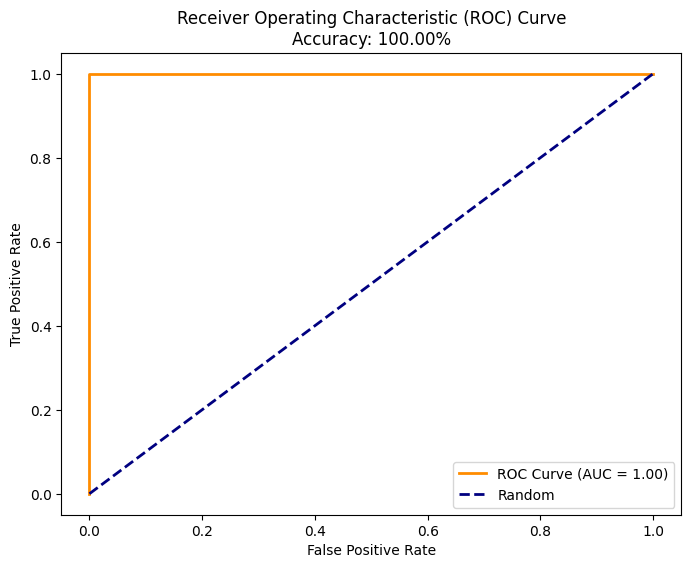

In [36]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
     acc * 100))
plt.legend(loc="lower right")
plt.show()

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [38]:
# prompt: print  precision    recall  f1-score   support

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        47

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



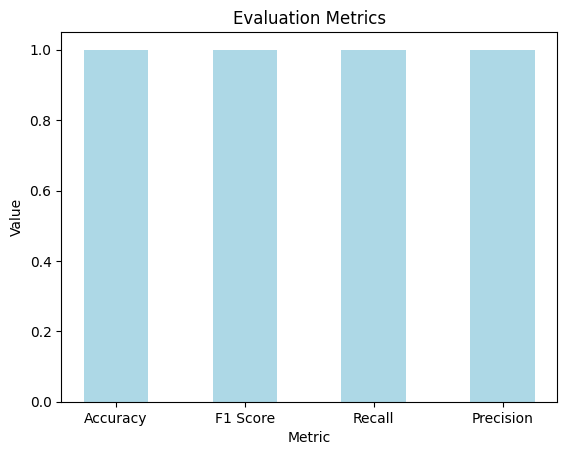

In [39]:
# Create a list of metrics
metrics = ["Accuracy", "F1 Score", "Recall", "Precision"]

# Create a list of values
values = [acc, f1, recall, precision]

# Create a bar chart
plt.bar(metrics, values, color='lightblue', width=0.5)

# Add title and axis labels
plt.title("Evaluation Metrics")
plt.xlabel("Metric")
plt.ylabel("Value")

# Show the plot
plt.show()


<Axes: >

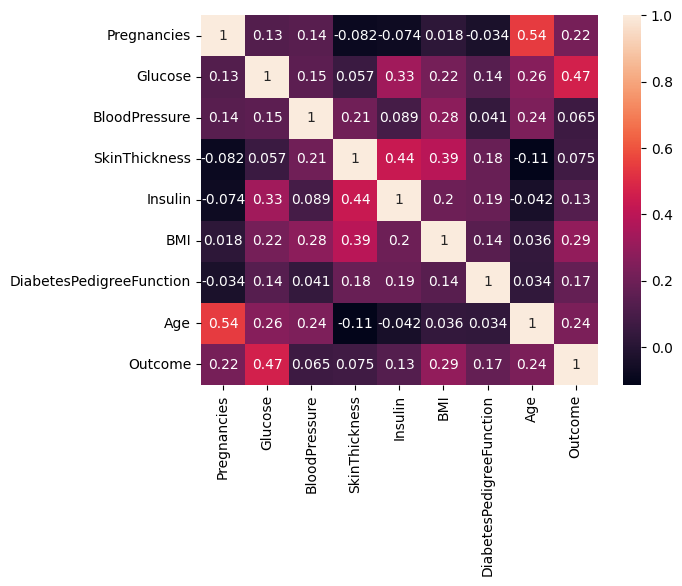

In [40]:
sns.heatmap(data.corr(), annot=True)